# **Assignment 1**
**Gabriele Turetta - s233124**<br>
**Fernando A Marina Urriola - s233144**

|| part 1 | part 2 | part 3 | part 4 |
|-|-----------|-----------|-----------|-----------|
|Gabriele Turetta| 45% | 55% | 55% | 45% |
|Fernando Marina| 55% | 45% | 45% | 55% |



## A1 Part 1: Visualizing patterns in the data

Load necesarry imports

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import missingno as msno
import numpy as np
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from folium import plugins, Map, Marker
from folium.plugins import HeatMap
import os
import calendar
import calplot

import plotly.io as pio
pio.renderers.default='notebook'

#set notebook options
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 10})
sns.set_style("white")
plt_color = 'darkorange'

Loading the data

In [60]:
# loading the data
# filename = r'./Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
# data = pd.read_csv(os.path.join('data',filename))
data = pd.read_csv('../week1/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv')
# until 31st of December 2017
data = data[pd.to_datetime(data.Date).dt.year < 2018]

# setting days of the week to categorical variables
data['day_of_week'] = pd.Categorical(data.DayOfWeek, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'], ordered=True)

# creating the time columns needed for the analysis
data['Timestamp'] = pd.to_datetime(data["Date"] + data["Time"], format="%m/%d/%Y%H:%M")
data['year'] = data['Timestamp'].dt.year.astype(int)
data['month'] = pd.Categorical(data['Timestamp'].dt.month_name(), categories=list(calendar.month_name), ordered=True)
data['hour'] = data['Timestamp'].dt.hour.astype(int)
data['hours_of_week'] = data['Timestamp'].dt.dayofweek * 24 + (data['Timestamp'].dt.hour + 1).astype(int)

First we check how many values are missing for each feature in the dataset and then we will plot this

In [61]:
data.isna().sum()

PdId                                                              0
IncidntNum                                                        0
Incident Code                                                     0
Category                                                          0
Descript                                                          0
DayOfWeek                                                         0
Date                                                              0
Time                                                              0
PdDistrict                                                        1
Resolution                                                        0
Address                                                           0
X                                                                 0
Y                                                                 0
location                                                          0
SF Find Neighborhoods 2 2                       

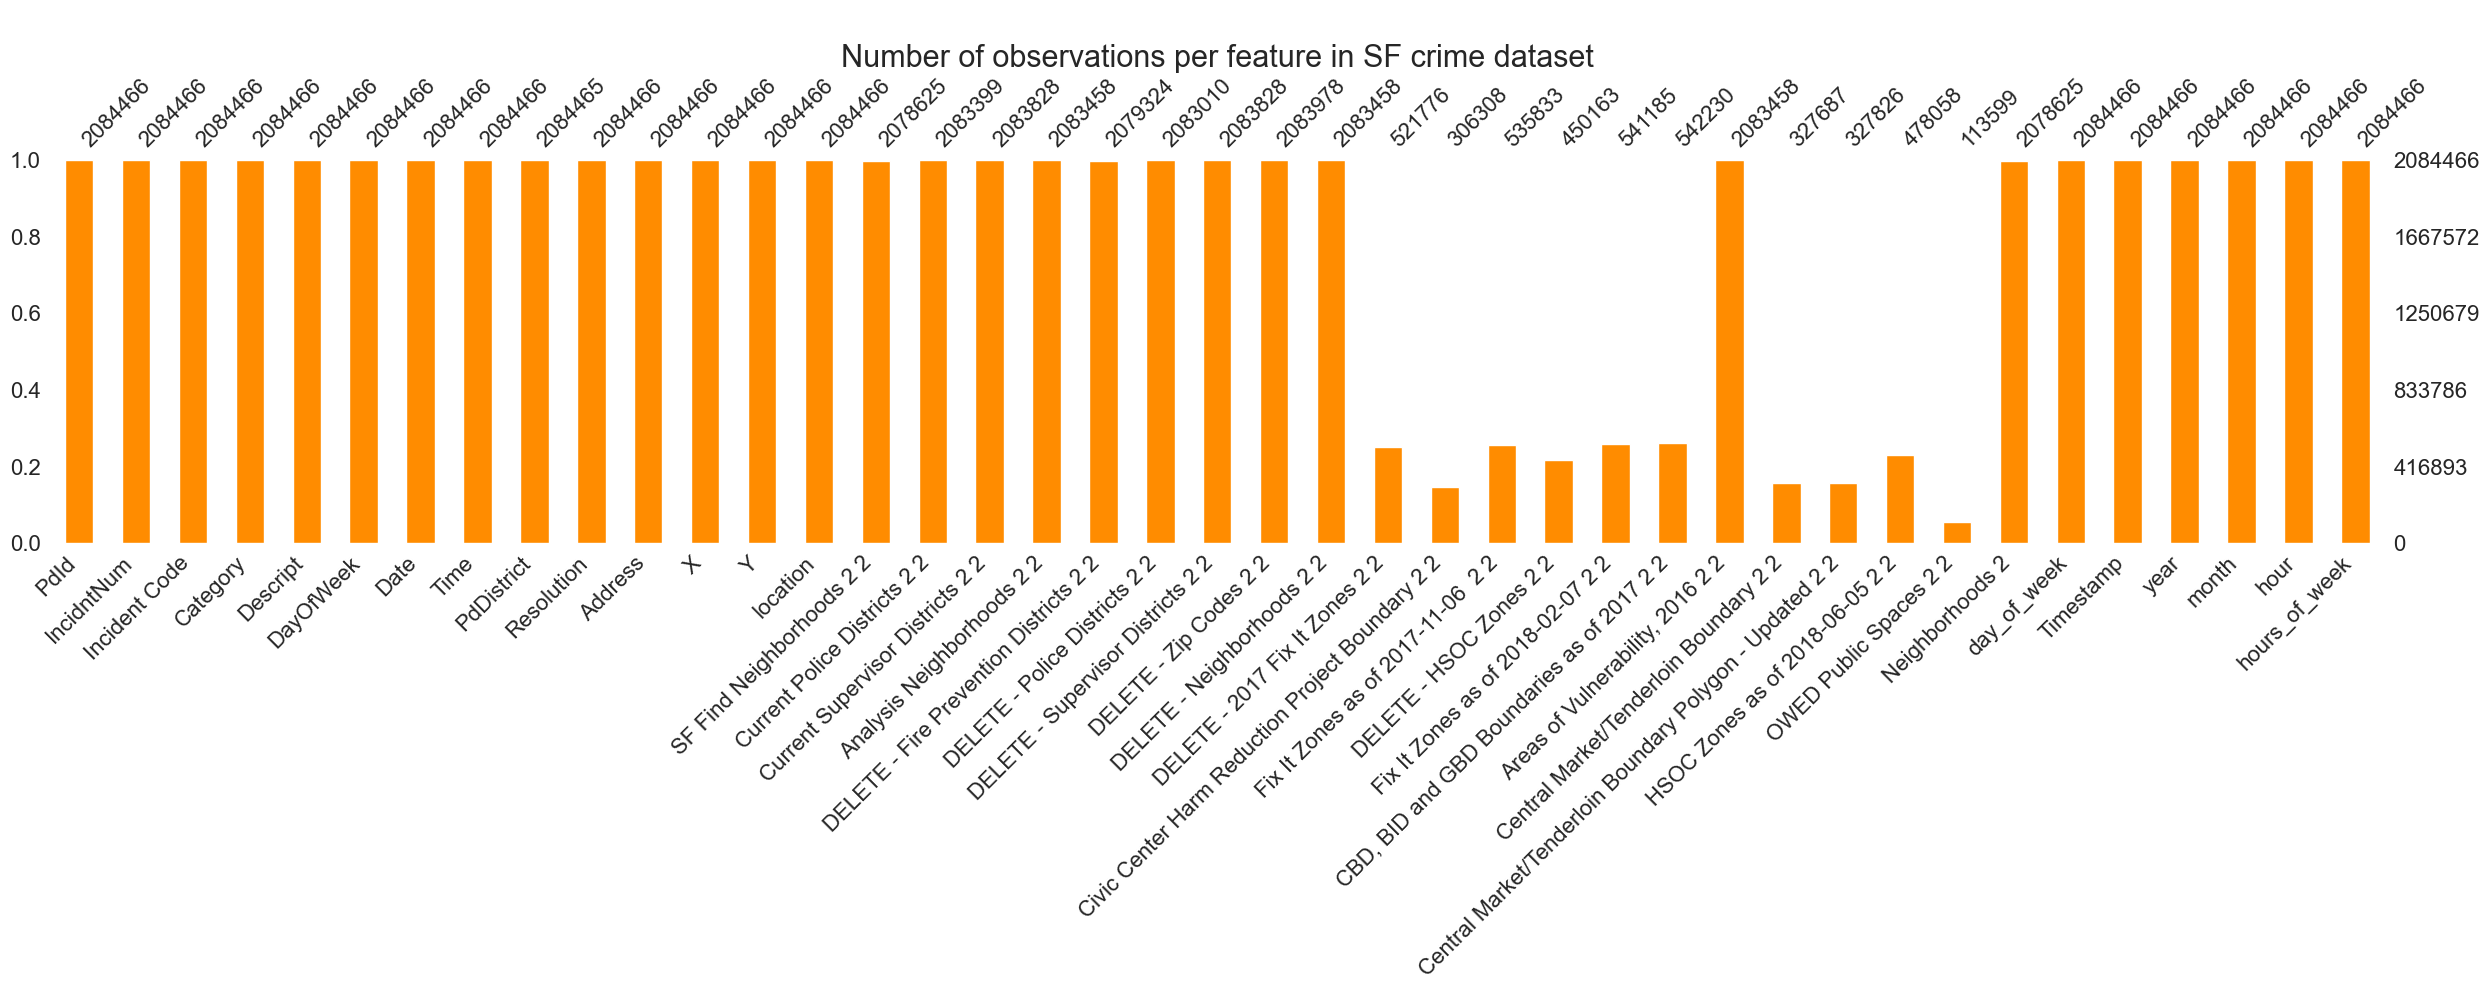

In [62]:
plt.figure(figsize=(20,8))
msno.bar(data, color=plt_color)
plt.title('\nNumber of observations per feature in SF crime dataset', fontsize=22)
plt.tight_layout()
plt.show()

It can be seen that the majority of the missing values does not belong to the important features/variables.
So we can continue with our analysis

### Crime Frequencies by month, week day, hour & hour of week
Let's start by defining a set of focus crimes that are of particular interest and a list of timeframes that are relevant for our analysis.

In [63]:
# focus crimes 
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 
'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 
'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])


# timeframes
timeframe = ['month','day_of_week','hour','hours_of_week']

# Get focus crimes_data
crime_data = data[data.Category.isin(focuscrimes)]
crime_data[['Category','Timestamp','year']+timeframe].head(3)

Category           Timestamp  year     month day_of_week  hour  \
0        ROBBERY 2004-11-22 17:50:00  2004  November      Monday    17   
1  VEHICLE THEFT 2005-10-18 20:00:00  2005   October     Tuesday    20   
2  VEHICLE THEFT 2004-02-15 02:00:00  2004  February      Sunday     2   

   hours_of_week  
0             18  
1             45  
2            147

Now we can plot the bar charts for each timeframe, to analyze how the focus crimes are distributed across the time.<br>

*Create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).*

C:\Users\Admin\AppData\Local\Temp\ipykernel_1748\1019393126.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



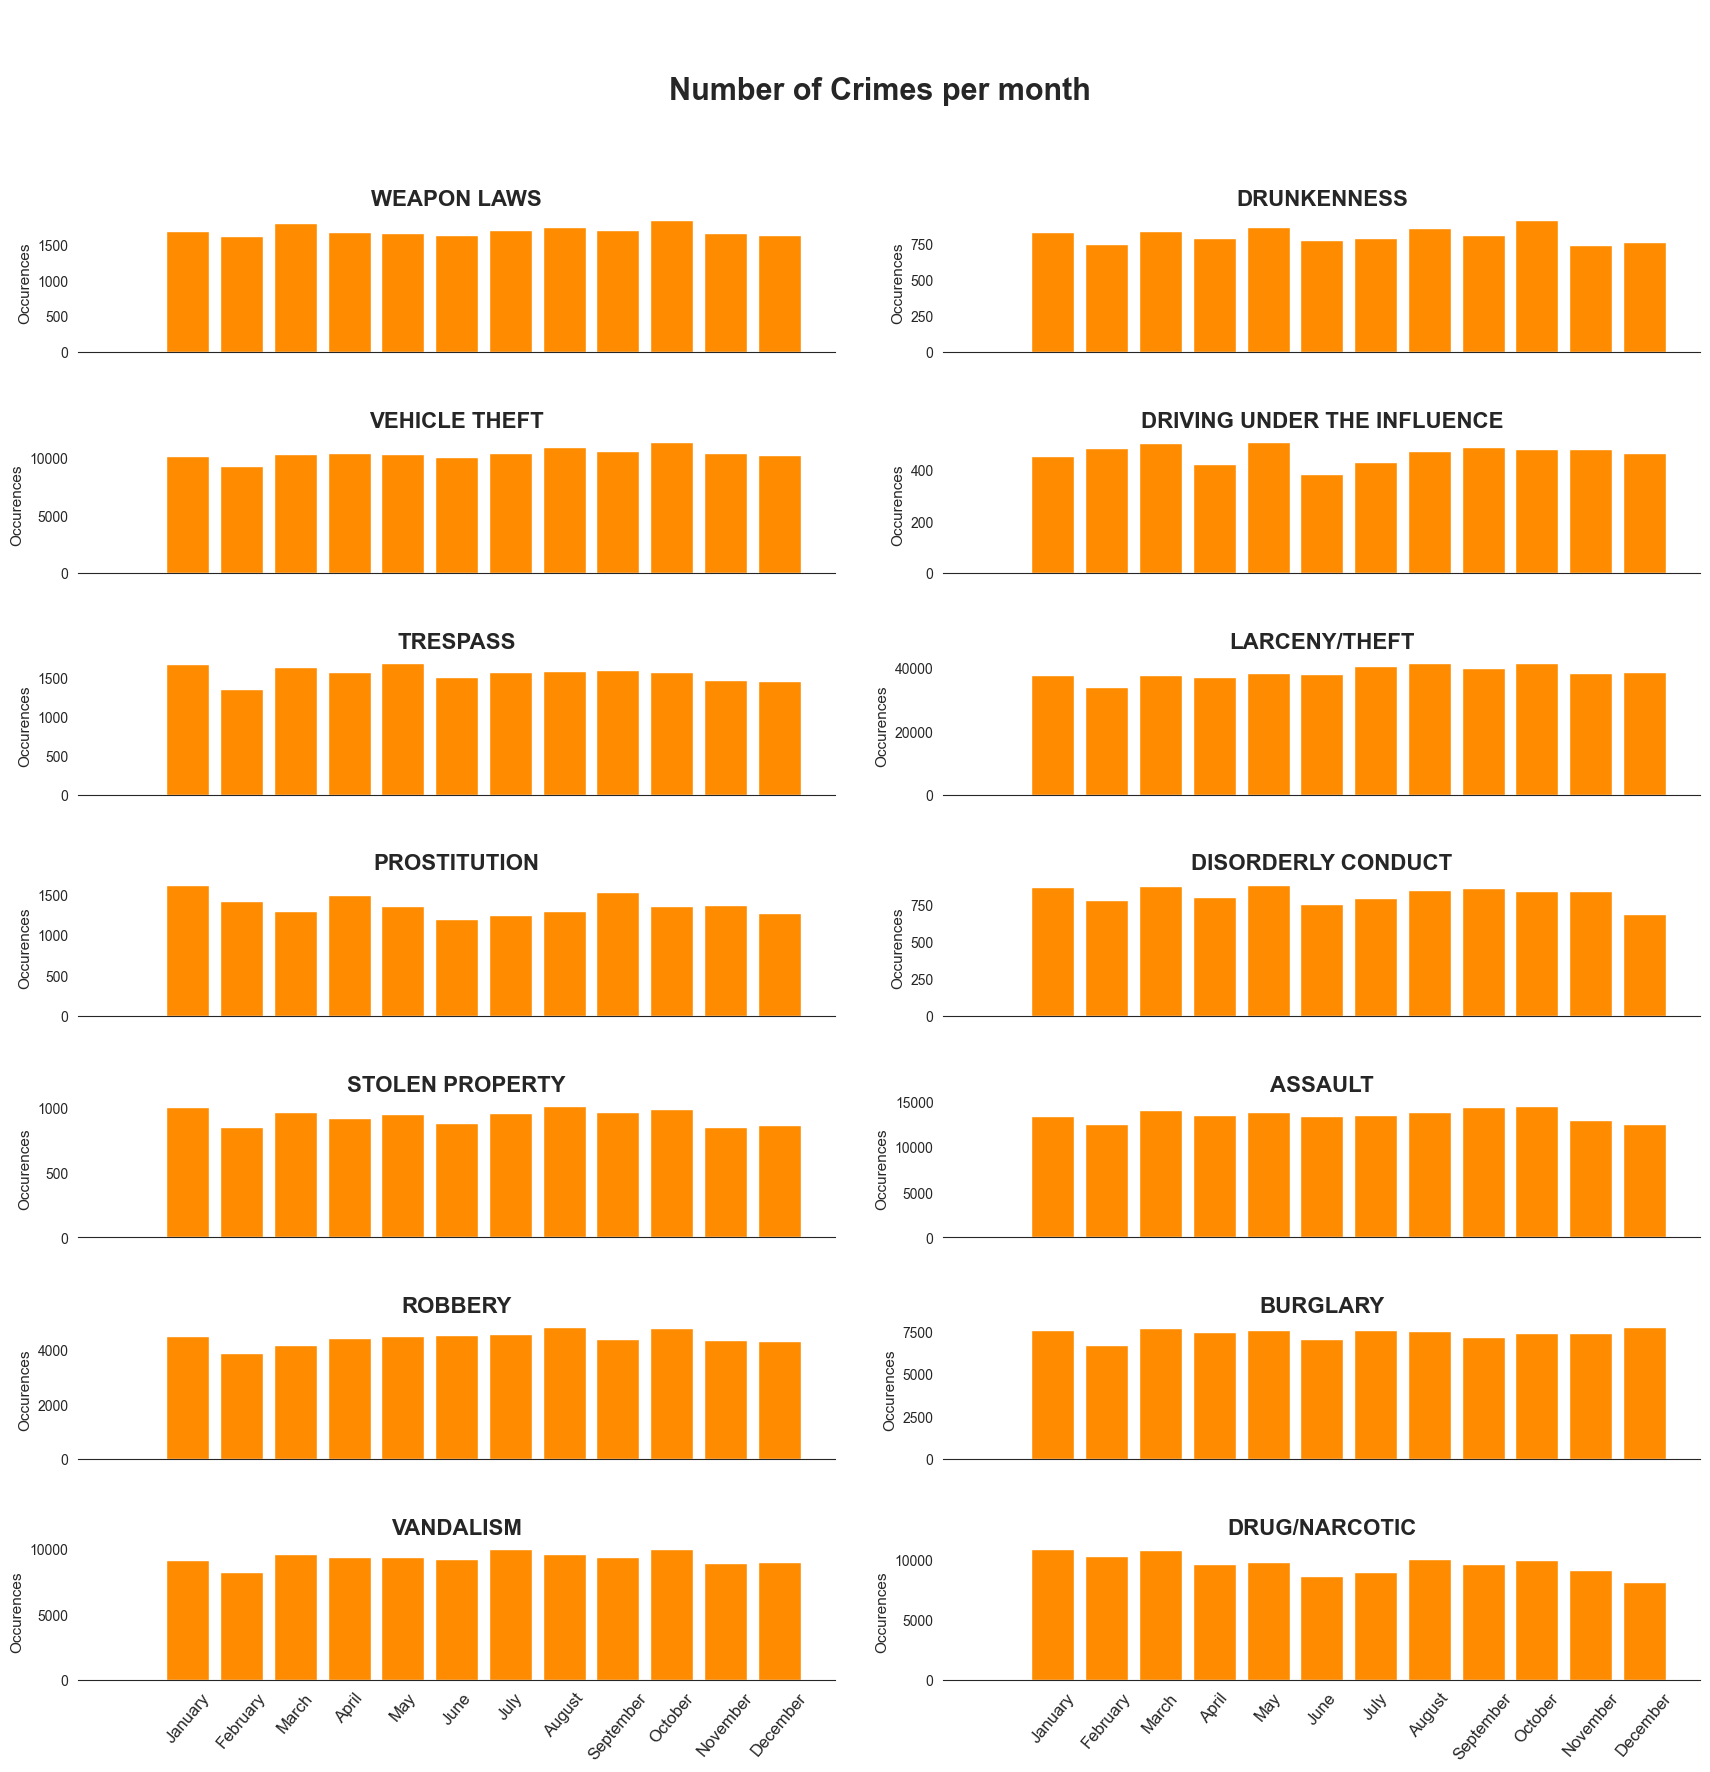

C:\Users\Admin\AppData\Local\Temp\ipykernel_1748\1019393126.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



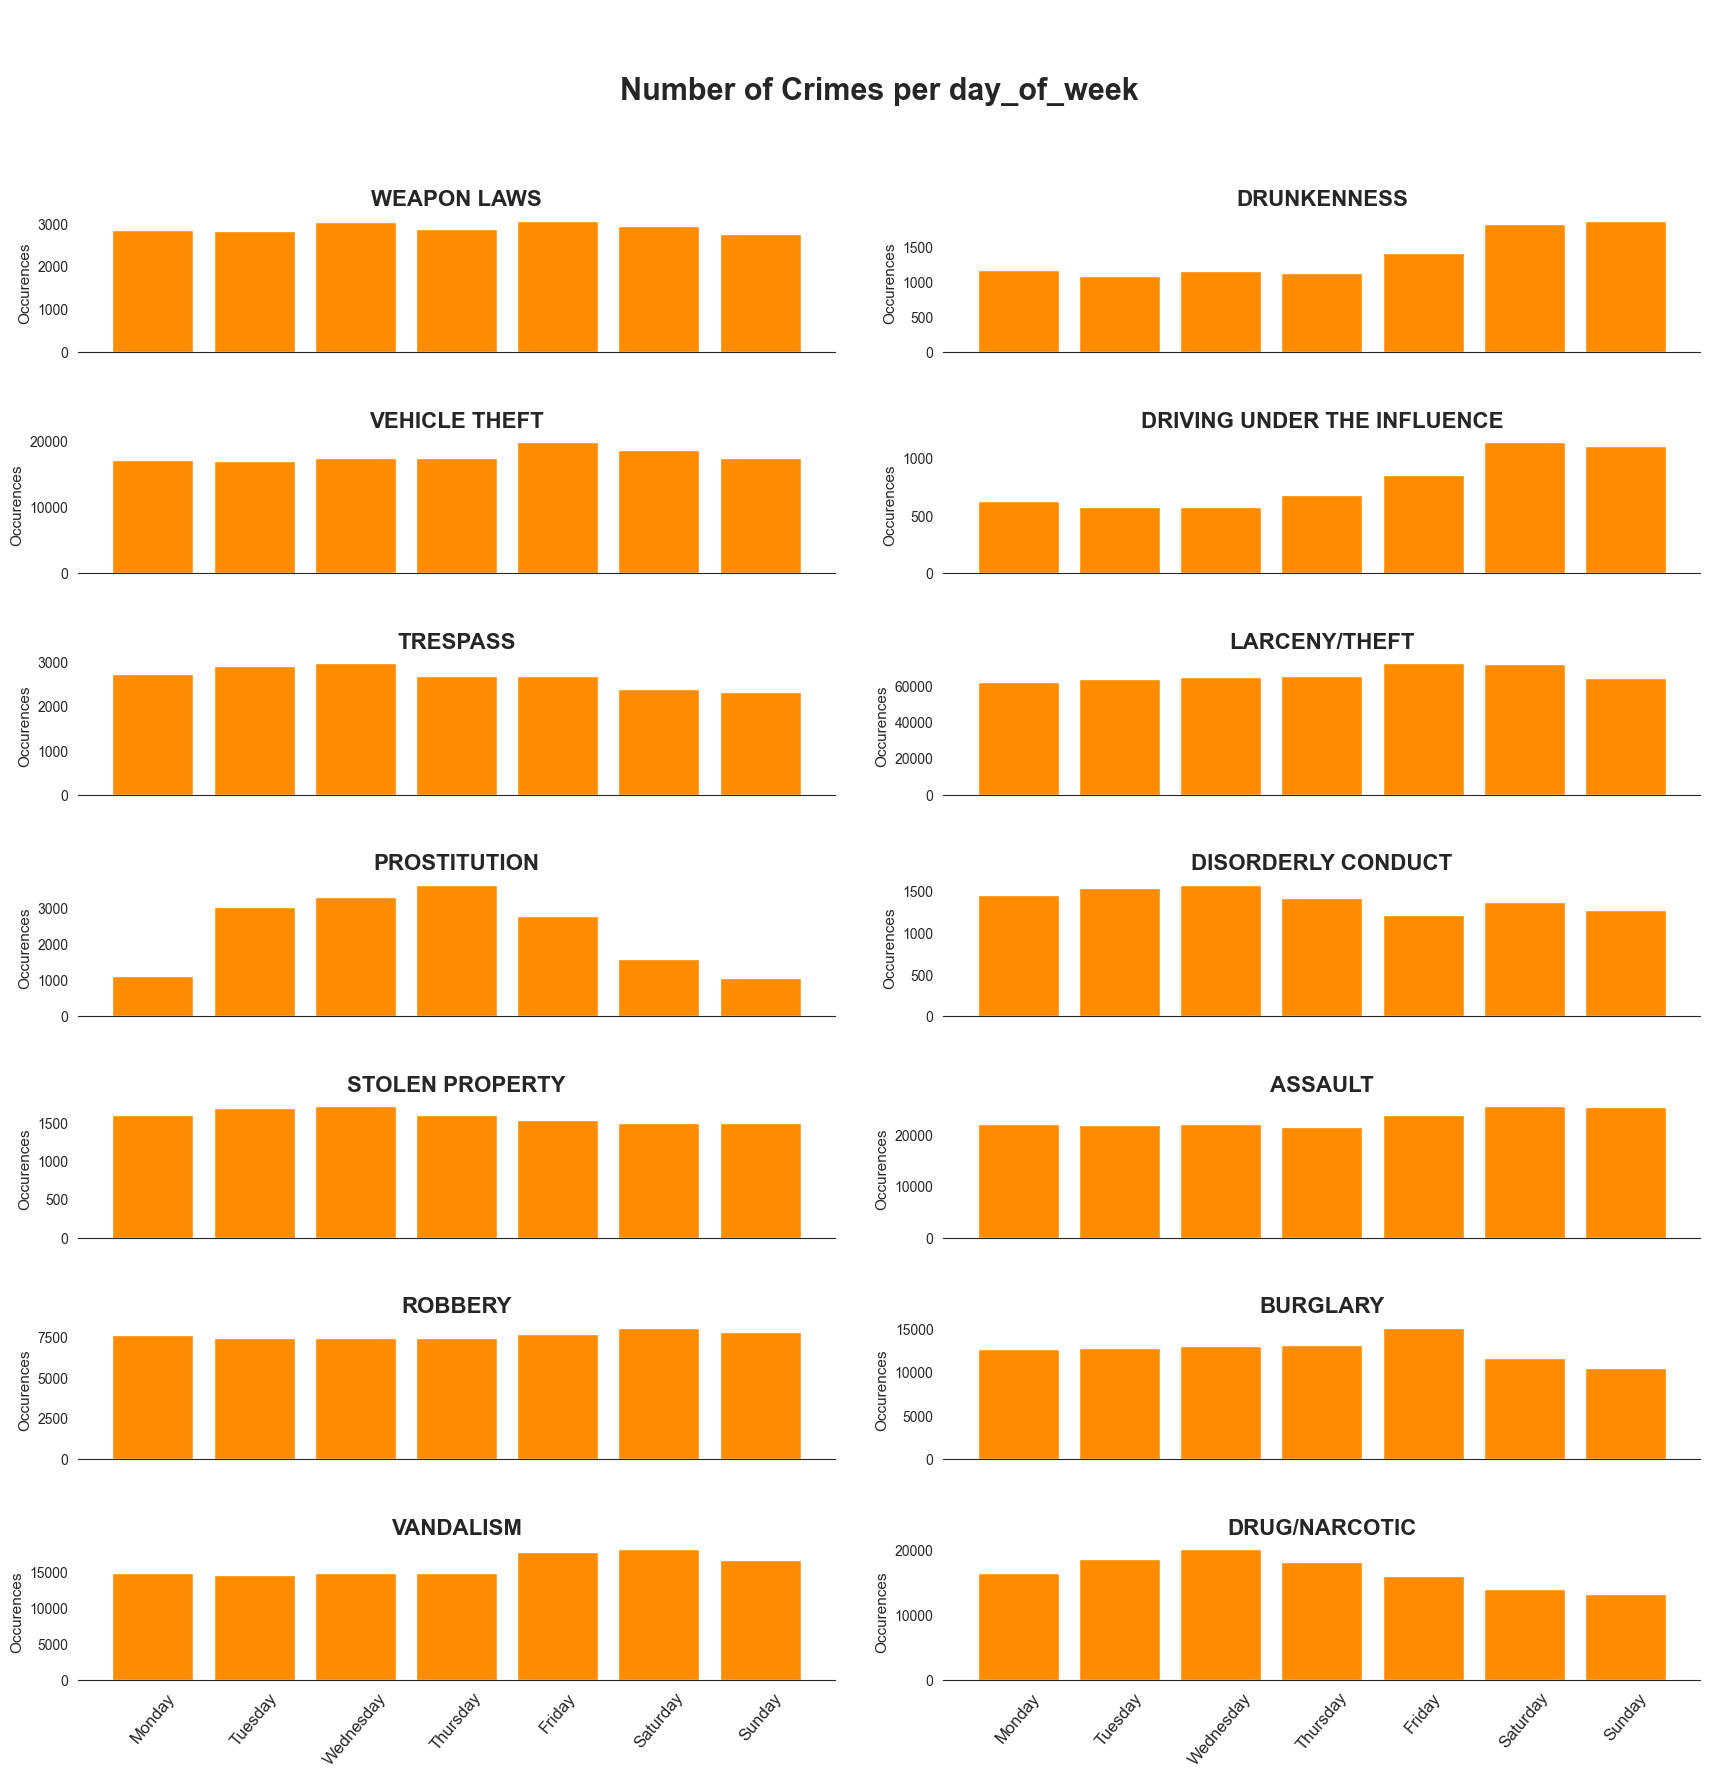

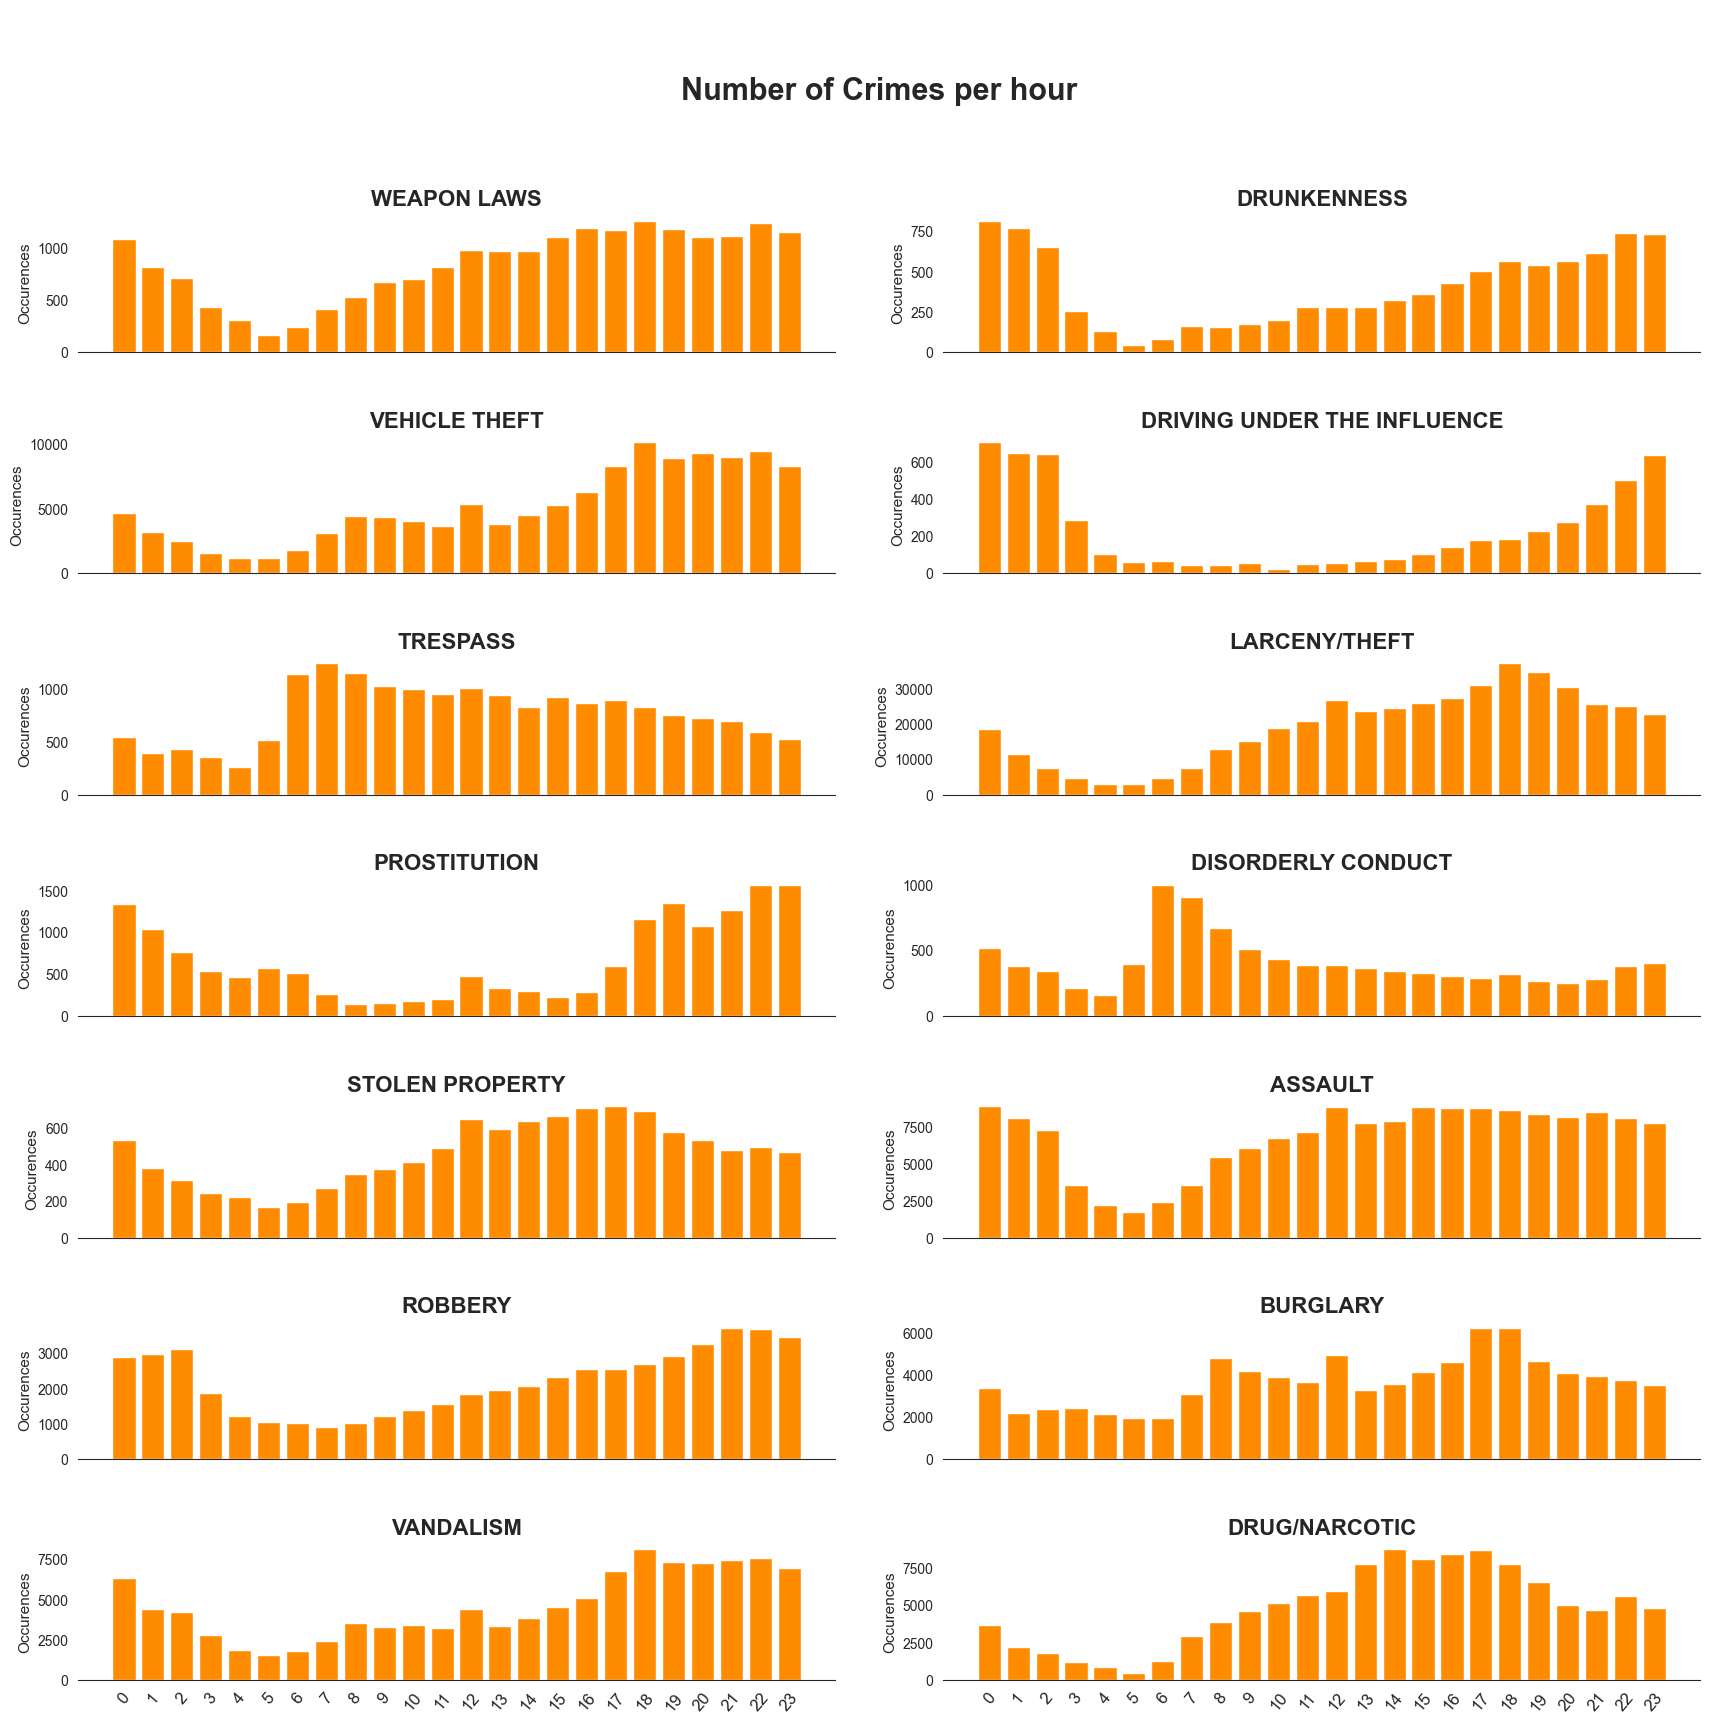

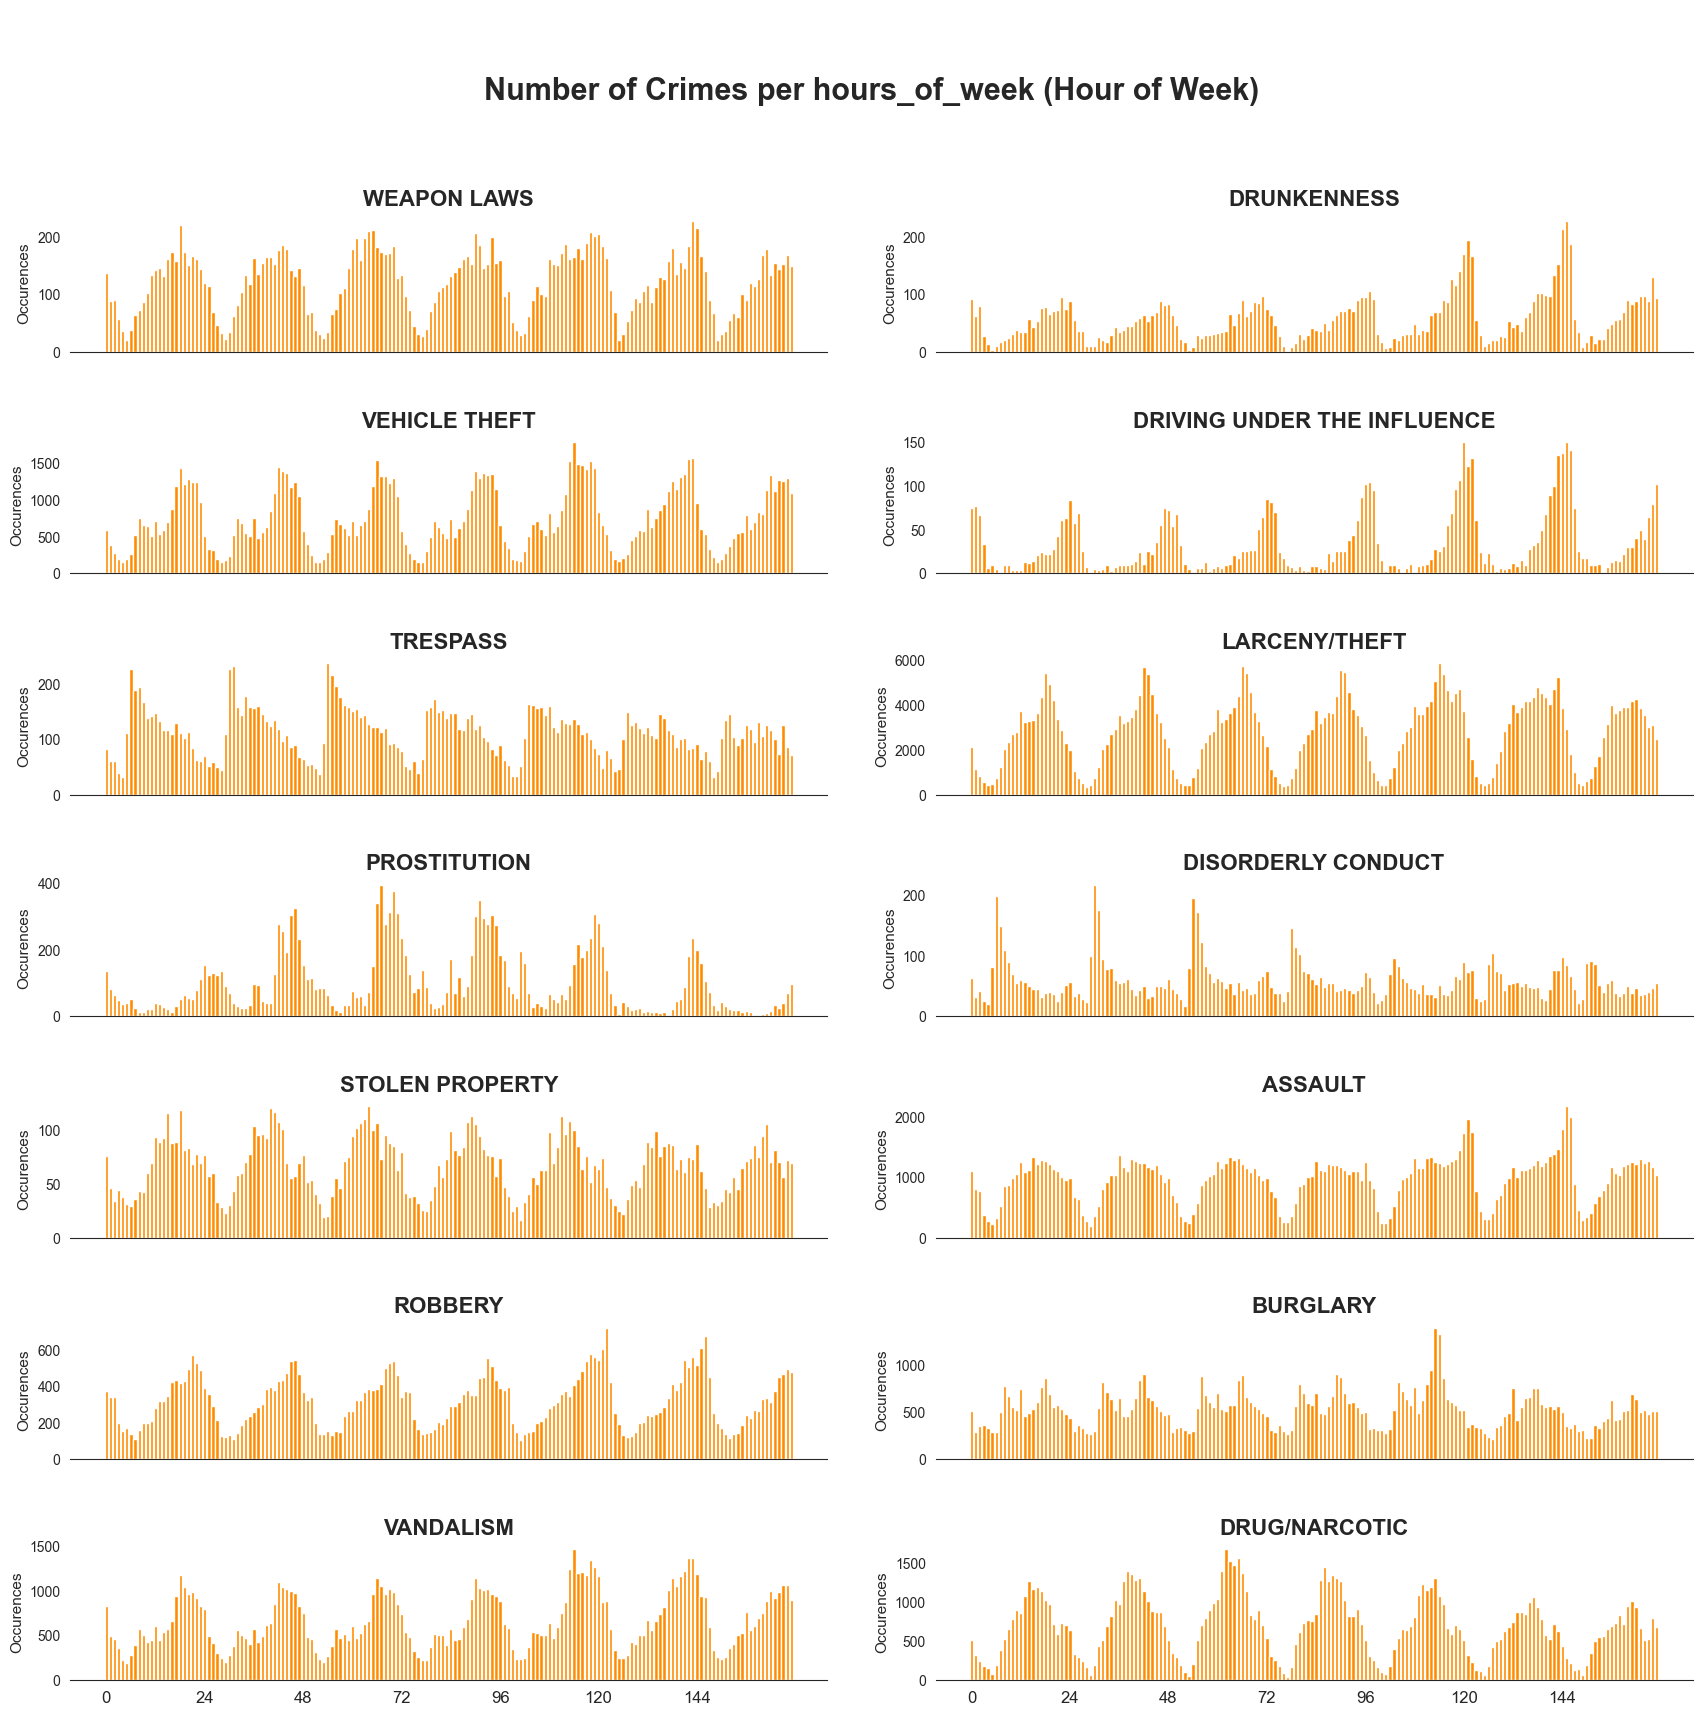

In [84]:
for t in timeframe:
    # Count crime occurences per timeframe by category
    grouped = crime_data.groupby(['Category', t]).size().reset_index(name='counts')
    pivot = grouped.pivot(index=t, columns='Category', values='counts')
    plt.rcParams["figure.figsize"] = (18,18)
    
    # Timeframe plot settings
    fig, axes = plt.subplots(7,2,sharex=True)
    if t=='hours_of_week':
      fig.suptitle(f"\n\nNumber of Crimes per {t} (Hour of Week)", weight='bold', fontsize=22)
    else:
      fig.suptitle(f"\n\nNumber of Crimes per {t}", weight='bold', fontsize=22)
    fig.tight_layout(pad=5.0)
    index = list(pivot.index) 
    x_pos = np.arange(len(index))

    for i, c in enumerate(focuscrimes):
        # plot by category
        ax = axes[int(np.floor(i/2)),i%2]
        ax.bar(x_pos, pivot[c], color=plt_color)
        if t=='hours_of_week':
          ticks=np.arange(0,168,24)
          ax.set_xticks(ticks)
          ax.set_xticklabels(ticks,fontsize=12)
        else:
          ax.set_xticks(x_pos)
          ax.set_xticklabels(index, rotation=50,fontsize=12)
        ax.set_ylabel('Occurences', fontsize=11)
        ax.set_title(f'\n\n{c}', fontsize = 16, weight='bold')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
    plt.show()

***Question:** For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).*

>**Month:** In general, the occurences of the majority of crime categories don't vary from month to month, with the exception of 'Driving under the influence' that decreases slightly during the month of June and increases in May. Prostitution occurs more frequently in January and September. But in the end, all features seems to be 'stable' from month to month <br>

>**Week Day:** 'Prostitution' and 'Drug/narcotics' occur more frequently in mid-week (Wednesday) peeks in number of crimes. 'driving under the influence' and 'drunkeness' occurs more frequently in weekends.<br>

>**Hourly:**
'Tresspass' is most likely during mornings and occurs with decreasing frequency during the day. What also seems a bit surprising is that 'disorderly conduct' has significantly peak time at 6-8AM and succeedingly decreases with a higher rate than 'tresspass'. Most other crimes become more frequent during the day and tend to be occuring mostly at evening/night time. As expected, both 'prostitution' and 'driving under the influence' is quite rare during daytime but at night time the frequence increase instantly.<br>

>**Hour of Week:** For most of the crime categories, the hourly patterns behave similar (sometimes amplified at specific days in the week). These amplifications also align with the observations in the weekly figure, where the mid week-peak for 'prostitution' can be observed as well as the crimes primarily occuring in weekends. This figure shows that' disorderly conduct' crimes has higher frequency peaks during the first days of the week. 


*Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.*


[]

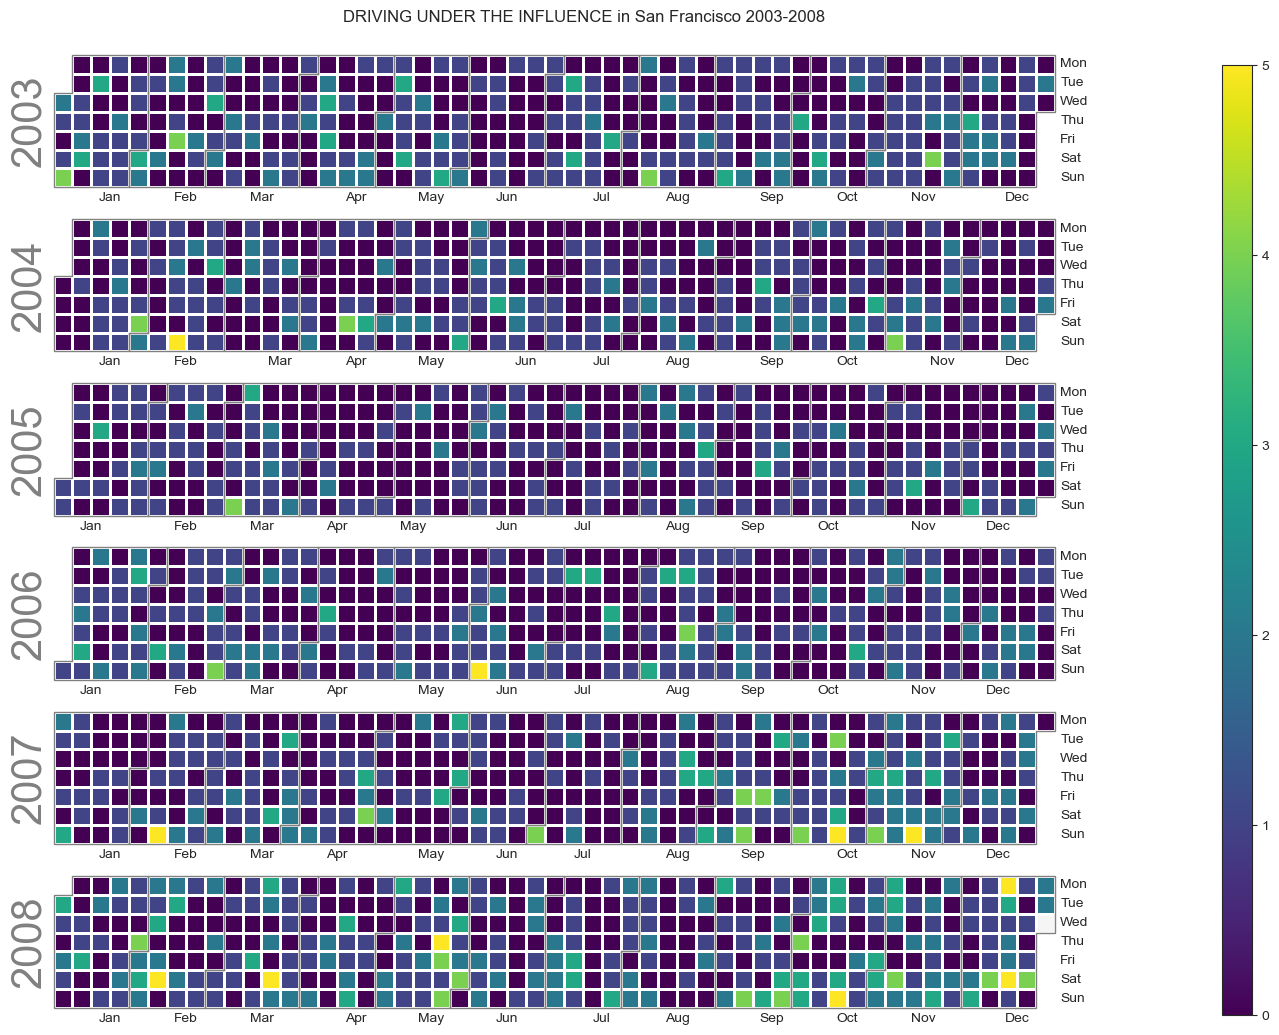

In [ ]:
crime_data.Date = pd.to_datetime(crime_data.Date) # Defining the Date column as a datetime variable.

# Setting up the calendar plot

font_path = fm.findfont("Arial")
fontproperties = fm.FontProperties(fname=font_path, size=20)
yearlabel_kws = dict(fontproperties=fontproperties)

calplot.calplot(
         crime_data[(crime_data.Category == 'DRIVING UNDER THE INFLUENCE') & (crime_data.year.isin(range(2003,2009)))]\
         .groupby(['Date'])\
         .count().PdId,
         suptitle='DRIVING UNDER THE INFLUENCE in San Francisco 2003-2008', 
         figsize=(15,10), 
         tight_layout=True,
         yearlabel_kws=yearlabel_kws
         )
plt.plot()

>**Answer:** From the calendar heatmap above it seems like the crime pattern of 'DRIVING UNDER THE INFLUENCE' present little peaks in January/February for every year. The overall number of crimes seems to increase from 2006 to 2008. Specifically, in 2008, numbers of crimes increase a lot, showing at least, approximately, 4/5 crimes every 2/3 months during 2008. Is interesting to see that 2005 was the year with least crimes. We were expecting peaks in December 24th or 31st but there are not.

*Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.*

We chose: PROSTITUTION, TRESPASS and DRUG/NARCOTIC

In [ ]:
grouped = crime_data.groupby(['Category','hour']).size().reset_index(name='counts')
pivot = grouped.pivot(index='hour', columns='Category', values='counts')

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2])

CAT = 'DRUG/NARCOTIC'
labels = pivot[CAT].index
fig.add_trace(go.Barpolar(
      name = CAT,
      r=pivot[CAT].values,
      theta=[str(i) for i in labels],
      width=np.ones(24),
      marker_color=plt_color,
      marker_line_color="black",
      marker_line_width=1,
      opacity=0.7
      ), 1, 1)

CAT2 = 'TRESPASS'
fig.add_trace(go.Scatterpolar(
      name = CAT2,
      r = pivot[CAT2].values,
      theta = [str(i) for i in labels],
    ), 1, 2)

CAT3 = 'PROSTITUTION'
fig.add_trace(go.Scatterpolar(
      name = CAT3,
      r = list(pivot[CAT3].values),
      theta = [str(i) for i in labels],
    ), 1, 2)

fig.update_polars(angularaxis_rotation=90, angularaxis_direction="clockwise")
fig.update_layout(title='Crime Frequency in 24-hour cycle',title_x=0.5)
fig.show("notebook")

<img src="https://github.com/magolimbo/Social_data_analysis_and_visualisation/blob/main/assignment1/images/image3.PNG" alt="Alt text" width="600">

>**Answer:** <br>
While 'TRESPASS' is most likely occuring during the day, 'PROSTITUTION' is most likely occuring during the evening and night. 'Drug/Narcotic' crimes are most likely occuring during the afternoon and evening (14-17h).

*Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).*

>In our examination of the San Francisco crime dataset from 2003 to 2008, we utilized Large Language Models (LLMs), particularly ChatGPT, to enhance our analysis. To efficiently handle the extensive dataset, we first developed a Python script for data loading, cleaning, and preprocessing.<br>
For visualizing spatial and temporal patterns in the data, we employed ChatGPT's assistance in generating code snippets for key plots. The creation of a polar plot to illustrate the spatial distribution of crime incidents required nuanced coding, and ChatGPT's guidance was instrumental in achieving precision. Additionally, in constructing bar plots to depict temporal trends such as hourly, monthly, and weekly crime occurrences, ChatGPT provided efficient code snippets tailored to our dataset.<br>
While LLMs like ChatGPT were valuable for their role in generating specific code snippets, it's crucial to note that our analysis was a collaborative effort that also incorporated traditional data analysis techniques. **The balanced integration of both LLMs and conventional methods enabled us to uncover insightful trends and patterns within the San Francisco crime data efficiently.**

## A1 Part 2: Dataviz questions

1. **What is the difference between data and metadata? How does that relate to the GPS tracks-example?**<br><br>
>Data refers to the raw information that is processed and analyzed, in the form of numbers, text, images, or other forms that have meaning in their specific context. Metadata, on the other hand, refers to 'data about data' and provide information about the context, format, and structure of the data, or other details that enrich and make the data itself more complete.<br><br>
    <img src="https://github.com/magolimbo/Social_data_analysis_and_visualisation/blob/main/assignment1/images/image1.png?raw=true" alt="Alt text" width="600">
<br><br>In the context of the GPS example, the data represents information related to the actual track, such as GPS position, timestamp and altitude of track points. These data are contained within the `<trkpt>` tags and are identified by the tags `lat`, `lon`, `ele` and `<time>` <br>
On the other hand, metadata provides additional information about the GPX file as a whole, such as the track name (`<name>`), information about the file's origin (`<creator>`), the link to Garmin Connect (`<link>`), and the global timestamp (`<time>`) indicating when the data was created or recorded in the Garmin Connect system.


2. **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.**
    - **Mention something that the human eye is very good at.**
    - **Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.**<br>
><br>We agree that the human eye is very unsuitable for extracting information from numbers and symbols but it is extremely skilled, more than machines, at recognizing shapes and making qualitative comparisons between them in terms of characteristics such as length, size, and color. This allows it to identify recurring patterns and discern differences and similarities, which can be valuable in various analytical tasks.
<br>However, not all information can be perfectly processed by the human eye. This happens, for example, when visual comparison occurs between data that have widely different scales of magnitude. An example concerns many visualizations that try to explain [the scale of the universe](https://www.youtube.com/watch?v=i93Z7zljQ7I). The human eye is initially able to understand the vastness of planets when compared to the Earth, but then completely loses cognition of the infinity of the universe when moving towards celestial entities of such magnitude that the human mind cannot even process.

3. **Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**<br>
>Simpson's Paradox is a statistical phenomenon where the same set of data can appear to show opposite trends depending on how it's grouped. This paradoxical effect occurs when a variable (sometimes called the lurking variable) that influences both the dependent and independent variables is not taken into account.
The [YouTube video](https://www.youtube.com/watch?v=sxYrzzy3cq8) about Simpson's Paradox uploaded by Ted-Ed, gives a nice example: there are two hospitals, A and B (independent variables), for elderly relative's surgery. Out of 1000 patients, 900 survive at hospital A and only 800 survive at hospital B (dependent variables). At a first glance it looks like Hospital A is the better choice. However, when considering the level of health (the lurking variable) with which the patiens arrive at the hospitals, an opposite trend appears. If we indeed consider the last 1000 patients that arrived at the hospital, hospital A had only 100 patients who arrived in poor health, of which 30 survived, while hospital B had 400, and they were able to save 210. Thus hospital B is the best choice for patients arriving with poor health, with a survival rate of 52.5% . Surprisingly, hospital B is the better choice also for patients arriving in good health, with a surviving rate of over 98%. The paradox appears, revealing that, taking into account the lurking variable of the health status, hospital B appears to be the best choice in both the situations, reversing the trend shown at the beginning that didn't take into account the lurking variable.

4. **In your own words, explain the difference between exploratory and explanatory data analysis.**<br>
>Exploratory data analysis is the initial phase of data analysis where the main goal is to explore and organize the data to gain insights and generate hypotheses. During EDA, various statistical and visualization techniques are used to uncover patterns and relationships within the data. The focus is on understanding the data's structure, identifying potential outliers, missing values or other anomalies .
On the other hand, explanatory data analysis is the next phase where the main goal is to explain or model the relationships observed during EDA. Analysts build predictive models or perform hypothesis in order to understand the underlying mechanisms driving the observed patterns in the data. The focus is on developing a deeper understanding of the data by identifying relationships and making predictions based on the data's features. We could say that the Exploratory phase is focused on the "what", while the Explanatory on the "why" and "how".

## A1 Part 3: Visualizing geodata using Plotly
In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from urllib.request import urlopen
import json
import plotly.express as px

data = pd.read_csv('../week1/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv')

crimes_filtered = data[(data["DayOfWeek"] == "Sunday") & (data["Category"] == "VEHICLE THEFT")]
crimes_by_district = crimes_filtered.groupby("PdDistrict").size()


crimes_by_district.items()

with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)


#convert to panda dataframe
df = pd.DataFrame(crimes_by_district.items(), columns=['District', 'Vehicle Thefts'])
print(df)

#3) creation of Choropleth map using plotly.express
fig = px.choropleth_mapbox(df, geojson=counties, locations='District', color='Vehicle Thefts',
                           color_continuous_scale="portland",
                           range_color=(df["Vehicle Thefts"].min(), df["Vehicle Thefts"].max()),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.77, "lon": -122.43},
                           opacity=1.0,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(
    title_text='Vehicle Theft by Police District on Sundays in San Francisco (portland color scale)',
    title_x=0.5,  # Set the title alignment to center
    margin={"r":0,"t":30,"l":0,"b":0}  # Adjust top margin to make space for the title
)
fig.show()


     District  Vehicle Thefts
0     BAYVIEW            2322
1     CENTRAL            1506
2   INGLESIDE            2846
3     MISSION            2400
4    NORTHERN            2001
5        PARK            1328
6    RICHMOND            1366
7    SOUTHERN            1566
8     TARAVAL            1943
9  TENDERLOIN             356


1. **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?** <br>
> Based on the map we created, the worst place to park the car on Sunday appears to be Ingleside, while the safets is Tenderloin
2. **Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):**
    - **Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?**<br>
    >By lowering the opacity and shrinking the range of colors used to display the data, the difference between districts become less evident, as shown in the code below. In particular the max color value displayed in the geo plot below has been changed from the maximum value present in the dataframe (Ingleside = 2846) to the double of its value.<br>

    - **Why do you think perceptual errors are a problem? Try to think of a few examples.**<br>
    >Perceptual errors are a problem because they can lead viewers to misinterpret the data presented in visualizations, ultimately affecting the understanding of the message that the data visualization aims to convey. When viewers misinterpret the data due to perceptual errors, they may draw incorrect conclusions and make flawed decisions. Two examples can be:
        - Misinterpretation of proportions in a pie chart representing the distribution of crimes by category. This can lead to viewers to overstimate the significance of certain categories and underestimating others
        - Biased color perception: different colors may be perceived differently by viewers, leading to biased interpretations of data. If we use for example `Hot` as our `color_continuous_scale` the map appears like this:<br>
        <br>
        <img src="https://github.com/magolimbo/Social_data_analysis_and_visualisation/blob/main/assignment1/images/image2.png?raw=true" alt="Alt text" width="300">
        <br>
        <br>As can be seen, the darkest color, which is usually perceived as "more" and "dangerous," is instead associated with the district with the fewest car thefts.
        

In [71]:
crimes_filtered = data[(data["DayOfWeek"] == "Sunday") & (data["Category"] == "VEHICLE THEFT")]
crimes_by_district = crimes_filtered.groupby("PdDistrict").size()


crimes_by_district.items()

with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)


#convert to panda dataframe
df = pd.DataFrame(crimes_by_district.items(), columns=['District', 'Vehicle Thefts'])
print(df)

#3) creation of Choropleth map using plotly.express
fig = px.choropleth_mapbox(df, geojson=counties, locations='District', color='Vehicle Thefts',
                           color_continuous_scale="reds",
                           range_color=(df["Vehicle Thefts"].min(), df["Vehicle Thefts"].max()*2),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.77, "lon": -122.43},
                           opacity=0.8,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(
    title_text='Vehicle Theft by Police District on Sundays in San Francisco (reds color scale)',
    title_x=0.5,  # Set the title alignment to center
    margin={"r":0,"t":30,"l":0,"b":0}  # Adjust top margin to make space for the title
)
fig.show()


     District  Vehicle Thefts
0     BAYVIEW            2322
1     CENTRAL            1506
2   INGLESIDE            2846
3     MISSION            2400
4    NORTHERN            2001
5        PARK            1328
6    RICHMOND            1366
7    SOUTHERN            1566
8     TARAVAL            1943
9  TENDERLOIN             356


# A1 Part 4: Errors in the data

*We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4).*

*The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.*

**· In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.**

>In the first scenario, a substantial increase in prostitution crimes on Thursday mornings may introduce bias into the binned or aggregated data, creating a misleading perception of crime distribution throughout the week. If the data is aggregated by the day of the week, it might inaccurately imply that crime is more concentrated on Thursdays than it truly is.
<br><br>The second issue involves a majority of crimes being recorded on the hour or half past the hour, potentially distorting binned or aggregated data. This can create a false impression of crime distribution, especially when aggregated by hourly or half-hourly intervals, suggesting uniformity that may not reflect actual patterns.
<br><br>The third case of human noise in the dataset occurs when numerous crimes are recorded at the geolocation corresponding to the Hall of Justice. This can distort binned or aggregated data, leading to an exaggerated representation of crime at that specific site.

**· Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).**

>Overlooking and not addressing human noise or bias in the San Francisco crime dataset can lead to distorted perceptions of crime patterns, as well as inaccurate models and predictions. Relying solely on binned or aggregated data without accounting for potential issues, like the timing of crime recording or the overrepresentation of crimes at the Hall of Justice, can introduce flaws into our analysis and models. Additionally, outliers such as the Thursday morning spike in crimes may impact our insights if not appropriately detected and addressed. It is crucial to recognize human noise and bias in the data to develop reliable crime prediction models and gain accurate insights into crime patterns in San Francisco. Neglecting these errors could result in poor decision-making, with significant consequences for public safety.

**· Find your own example of human noise in the data and visualize it.**

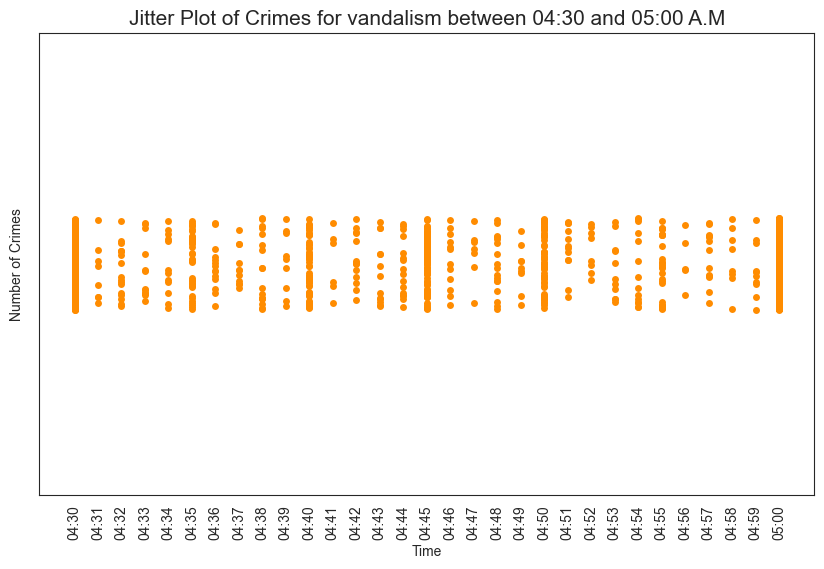

<Figure size 4000x1000 with 0 Axes>

In [90]:
import seaborn as sns

data_vandalism = data[(data['Category'] == 'VANDALISM') & data['Time'].between('04:30', '05:00')]
data_vandalism = data_vandalism.sort_values('Time')
#data_vandalism

plt.figure(figsize=(10, 6))
sns.stripplot(data=data_vandalism, x="Time", jitter=True, color=plt_color)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Crimes')
plt.title('Jitter Plot of Crimes for vandalism between 04:30 and 05:00 A.M', fontsize = 15)

plt.figure(figsize=(40, 10))
plt.show()

#print(data_vandalism['Time'].values)

In this jitter plot that represents the crimes of vandalism, between 4:30h and 5:00h, we can see that most of the crimes were recorded every 5 minutes, which seems to be suspicious.

**· Did you find LLMs useful for anything in this exercise? Explain why/why not.**


>From our point of view using LLMs is always useful as they provide a quick answer to our questions. ChatGPT has come to be a useful tool on a daily basis. We udnerstand it as a explorer where you can ask whatever you wonder and it will answer you rapidly, normally, it still does errors but if you create a good prompt, the answer may be good as well. Overall, we find it usfel as we use it for the data analysis as already mentioned and as well it helped as to solver some errors we encountered with the above plot